<a href="https://colab.research.google.com/github/abhiyantaabhishek/test/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Test_data.zip

In [12]:
!ls Test_data/

Test  Train  Val


In [11]:
!mv Test_data/Sample_Submission.csv Sample_Submission.csv

In [ ]:
drive.flush_and_unmount()

In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
classess = os.listdir("Test_data/Train/")
classess

['animal', 'airplane', 'truck', 'car', 'human']

In [23]:
for class_ in classess:
  img_path = os.path.join("Test_data/Train/",class_)
  print( "No of Img Train:", len(os.listdir(img_path)),',',class_)

No of Img Train: 194 , animal
No of Img Train: 194 , airplane
No of Img Train: 194 , truck
No of Img Train: 194 , car
No of Img Train: 194 , human


In [24]:
for class_ in classess:
  img_path = os.path.join("Test_data/Val/",class_)
  print( "No of Img Val:", len(os.listdir(img_path)),',',class_)

No of Img Val: 582 , animal
No of Img Val: 582 , airplane
No of Img Val: 582 , truck
No of Img Val: 582 , car
No of Img Val: 582 , human


In [ ]:
train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

for root, dirs, files in os.walk("Test_data"):
   for name in files:
      full_path = os.path.join(root, name)
      data_type = full_path.split(os.sep)[1]
      img = plt.imread(full_path)
      if(data_type == "Train"):
        label = full_path.split(os.sep)[2]
        train_images.append(img)
        train_labels.append(label)
      elif ( data_type == "Val"):
        label = full_path.split(os.sep)[2]
        val_images.append(img)
        val_labels.append(label)
      else:
        test_images.append(img)

In [46]:
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)
lb = LabelBinarizer()
lb.fit(train_labels)
print(lb.classes_)
train_label_onehot = lb.transform(train_labels)
val_label_onehot = lb.transform(val_labels)

['airplane' 'animal' 'car' 'human' 'truck']


In [20]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
assert len(train_images) == len(train_labels)
assert len(val_images) == len(val_labels)

(970, 96, 96)
(2910, 96, 96)
(1940, 96, 96)


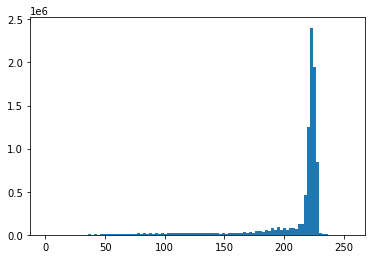

In [29]:
hist = plt.hist(train_images.flatten(),bins=100)

In [33]:
train_images_normalised = (train_images-train_images.mean())/train_images.std()
val_images_normalised = (val_images-val_images.mean())/val_images.std()

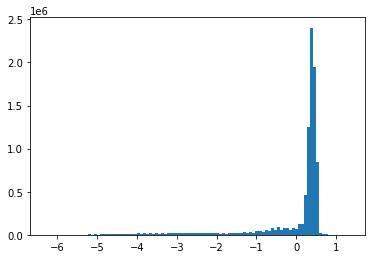

In [31]:
hist = plt.hist(train_images_normalised.flatten(),bins=100)

In [ ]:
Augmented_training = ImageDataGenerator(rotation_range=90,
                                        fill_mode='nearest',
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        width_shift_range=0.1,
                                        height_shif_range=0.1)